In [17]:
import pandas as pd
import numpy as np 
data = pd.read_csv('data.csv') 

In [18]:
data.replace('?', np.nan, inplace = True)
data = data.astype({"age": np.float64, "fare": np.float64})

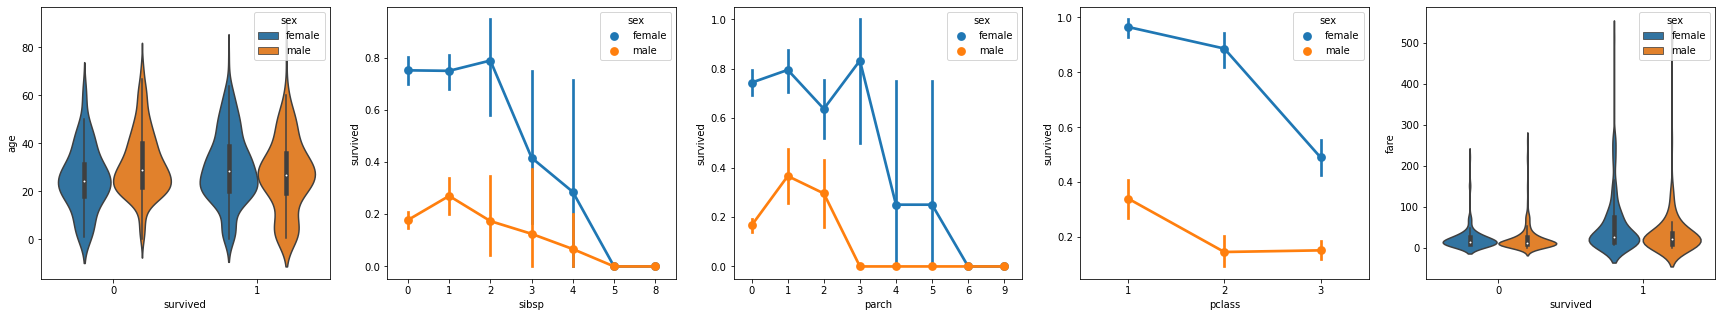

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [20]:
data.replace({'male': 1, 'female': 0}, inplace = True) 

In [21]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [22]:
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis = 1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [23]:
# Drop parch and sibsp;
# Drop any columns with missing values
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

In [34]:
# Split data into parts: train, test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
       data[['sex', 'pclass', 'age', 'relatives', 'fare']]
       , data.survived
       , test_size = 0.2
       , random_state = 0
    )

In [41]:
# Normalize features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test  = sc.fit_transform(x_test)

In [42]:
# Train model with Naive Bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
# Test model accuracy

from sklearn import metrics

predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7607655502392344


In [44]:
# Setup simple neural net

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()